### Customer Churn Analysis

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [168]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


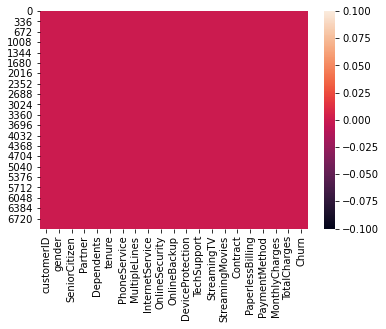

In [169]:
sns.heatmap(data.isnull())

In [170]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [171]:
#No null values

In [172]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [173]:
data.customerID.nunique()

7043

In [174]:
#we can drop customerId since all values are different

In [175]:
data.drop("customerID", inplace=True, axis=1)

In [176]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [177]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [178]:
data.MultipleLines.nunique()

3

In [179]:
data.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [180]:
data[data.MultipleLines == 'Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [181]:
data[data.PhoneService == 'Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


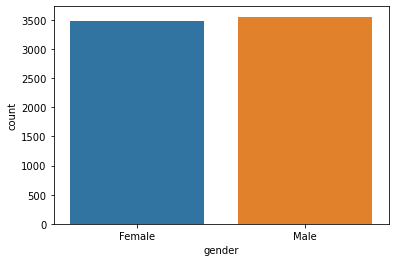

In [182]:
sns.countplot(data.gender)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


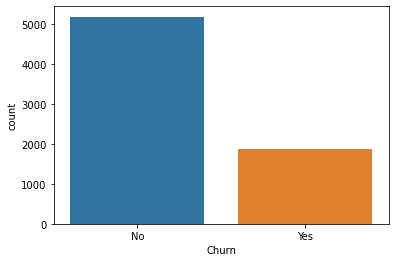

In [183]:
sns.countplot(data.Churn)

In [184]:
#output data is not balanced

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


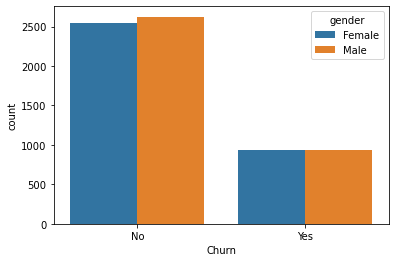

In [185]:
sns.countplot(data.Churn, hue=data.gender)

In [186]:
#output is not depend upon the customers gender. so we can drop the gender column

In [187]:
data.drop("gender", inplace=True, axis=1)

In [188]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


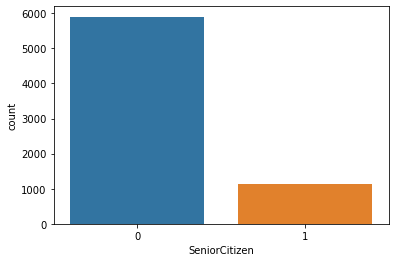

In [189]:
sns.countplot(data.SeniorCitizen)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


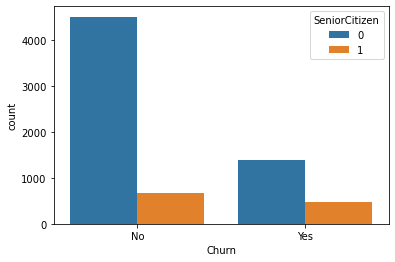

In [190]:
sns.countplot(data.Churn, hue=data.SeniorCitizen)

In [191]:
#There is a more chance of Churning for Senior citizen people

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


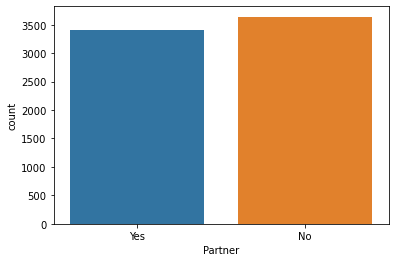

In [192]:
sns.countplot(data.Partner)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


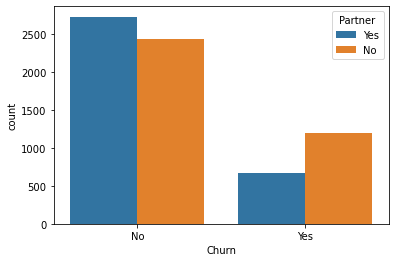

In [193]:
sns.countplot(data.Churn, hue=data.Partner)

In [194]:
#There is a lesser chance of churn in people who have a partner

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


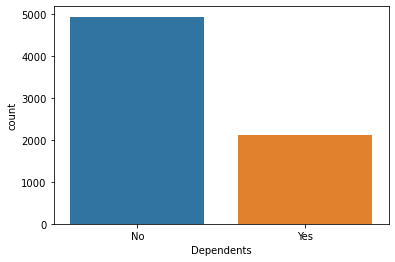

In [195]:
sns.countplot(data.Dependents)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


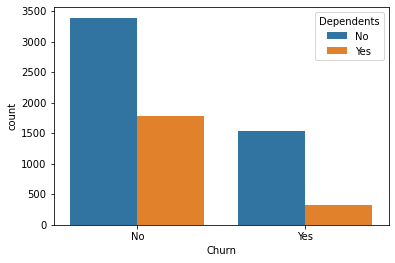

In [196]:
sns.countplot(data.Churn, hue=data.Dependents)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


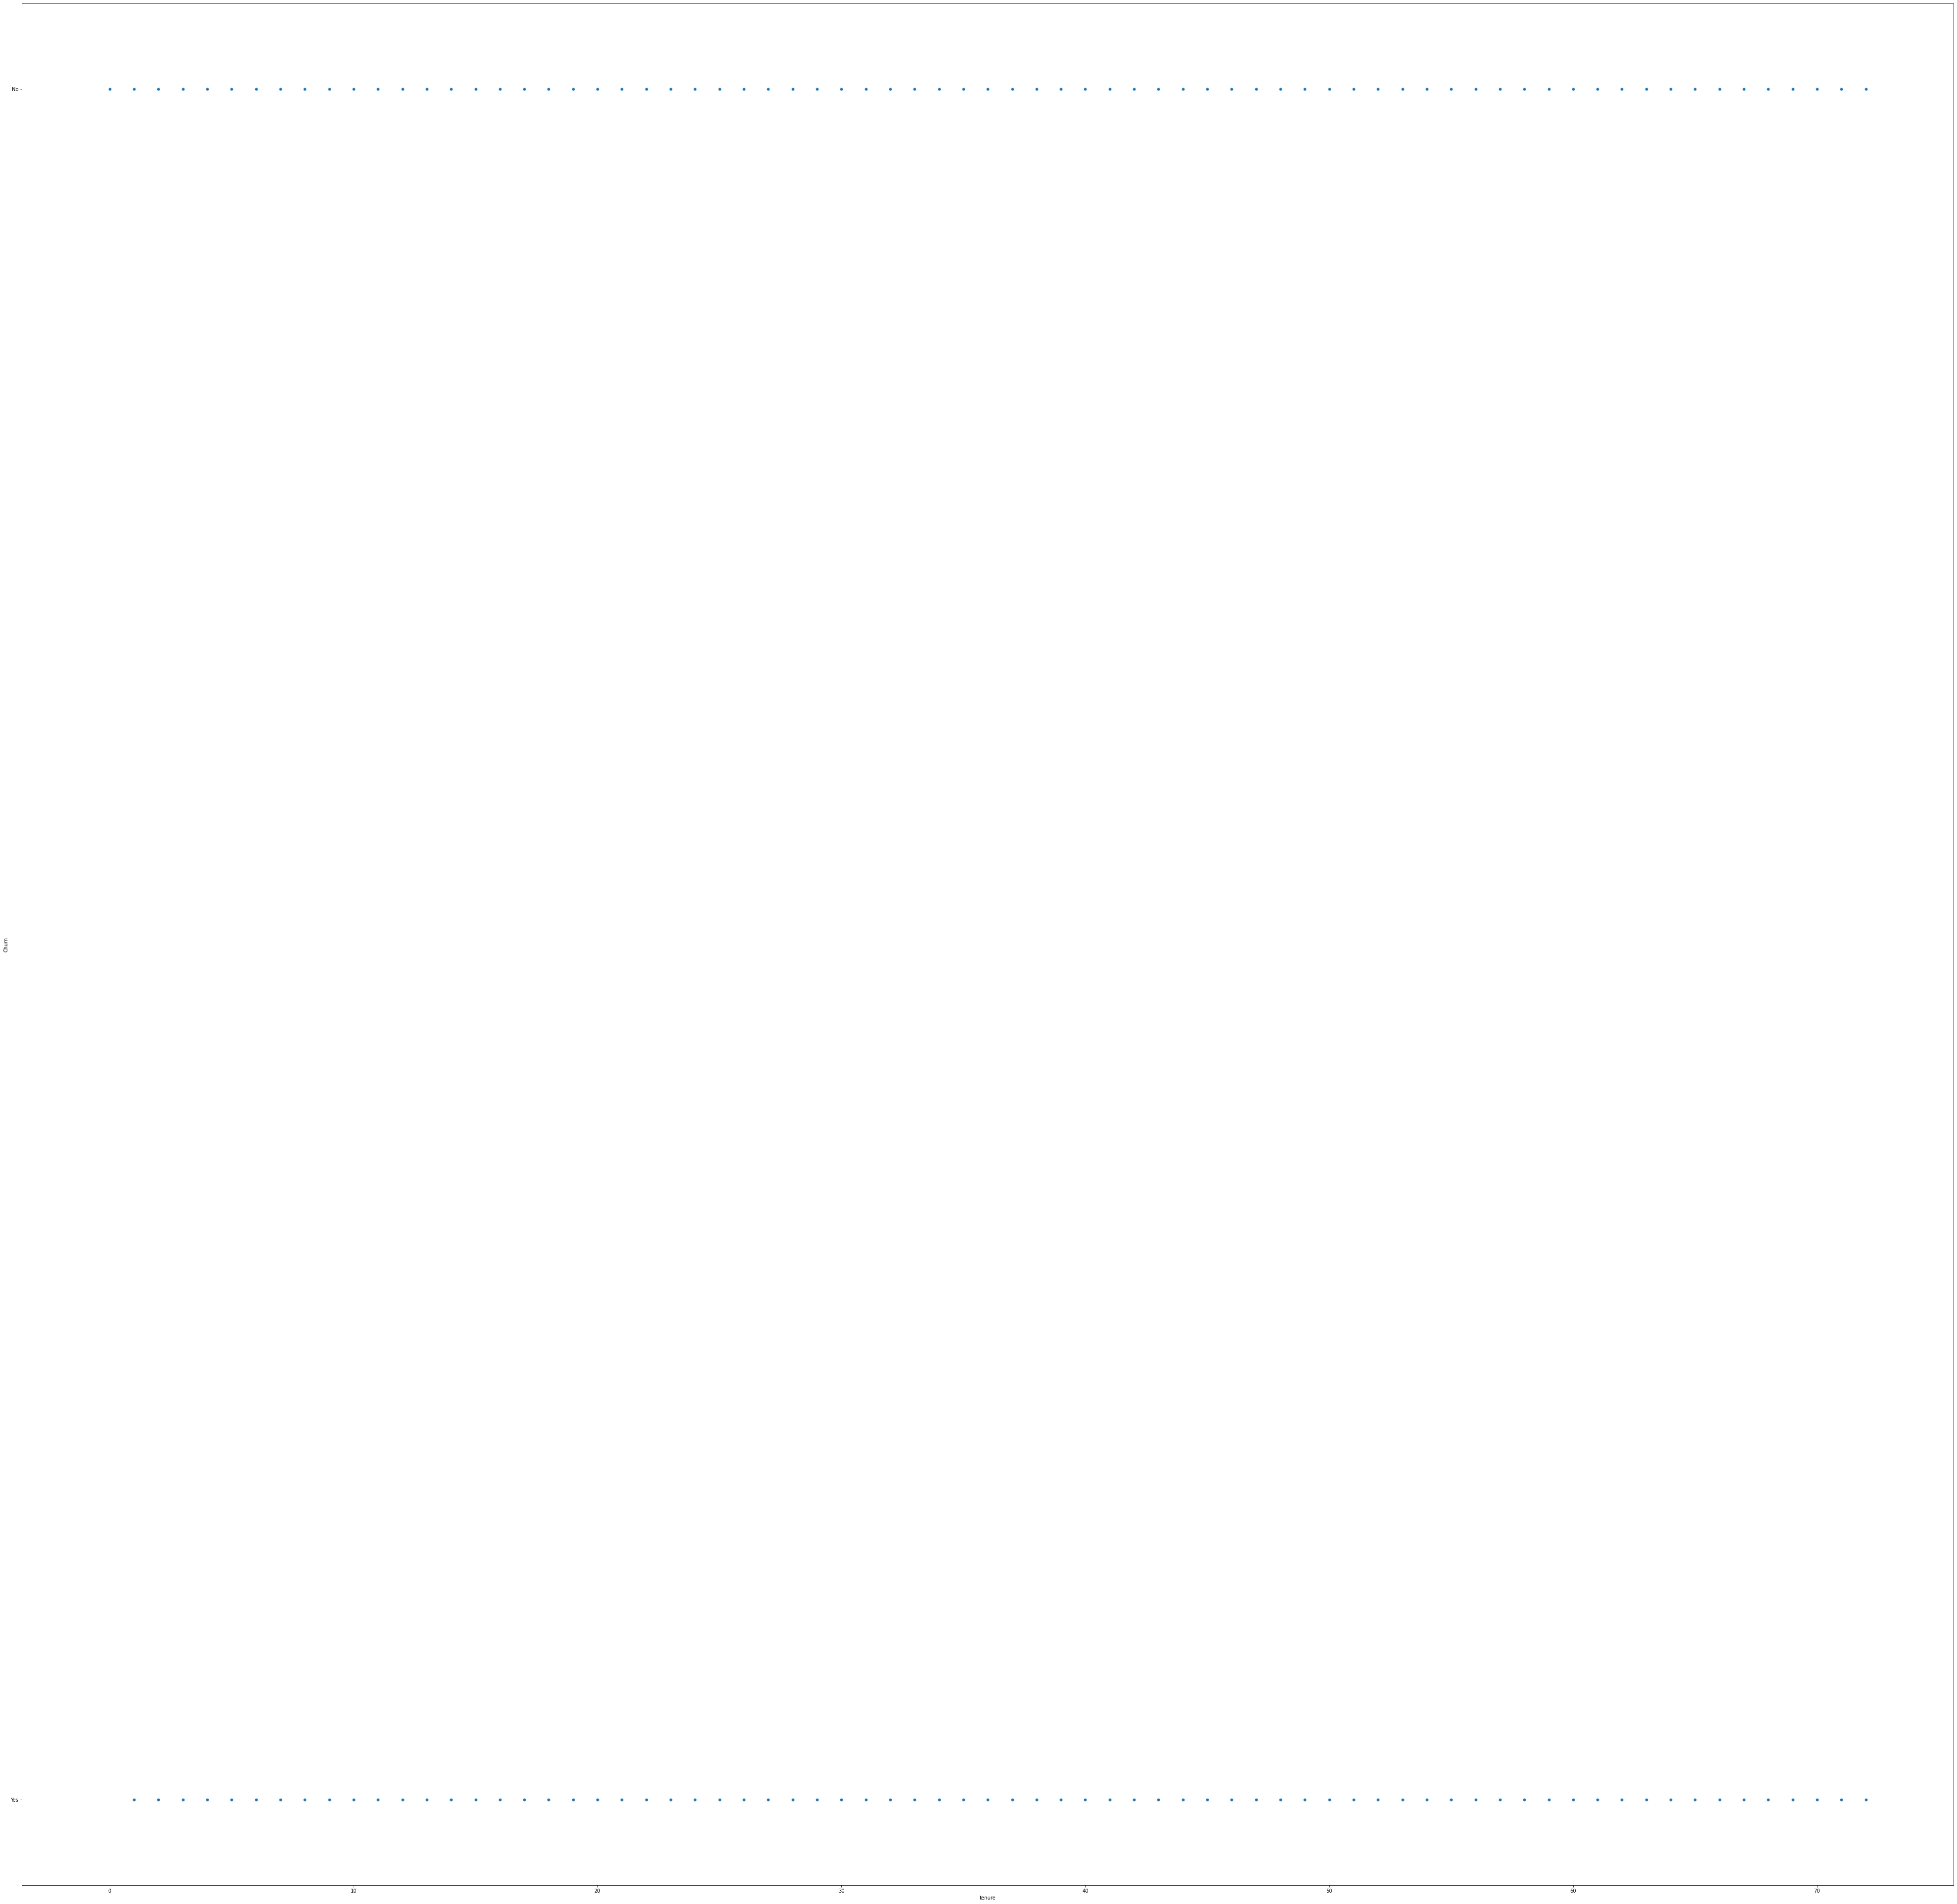

In [197]:
plt.figure(figsize=(70,70))
sns.scatterplot(data.tenure, data.Churn)

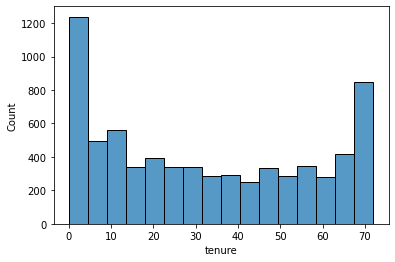

In [198]:
sns.histplot(data.tenure)

In [199]:
#Tenure has very less impact on Churn

In [200]:
data.OnlineBackup

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: OnlineBackup, Length: 7043, dtype: object

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


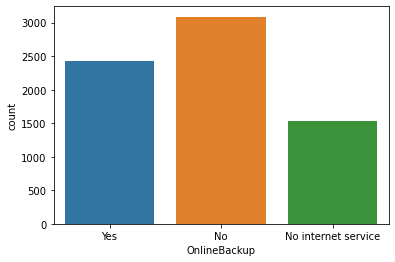

In [201]:
sns.countplot(data.OnlineBackup)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


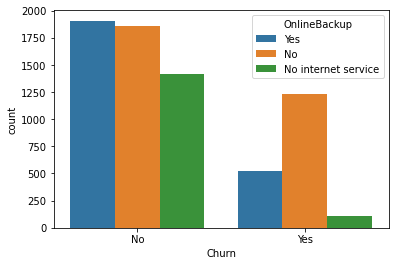

In [202]:
sns.countplot(data.Churn, hue=data.OnlineBackup)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


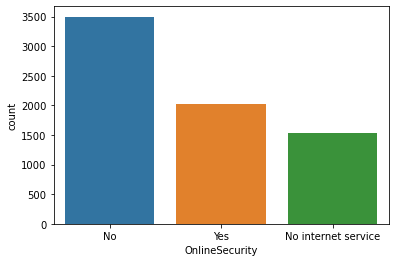

In [203]:
sns.countplot(data.OnlineSecurity)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


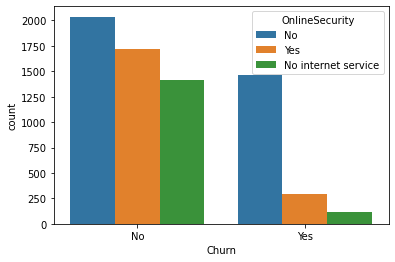

In [204]:
sns.countplot(data.Churn,hue=data.OnlineSecurity)

In [205]:
c_yes = data[data.Churn == 'Yes']
ob_y = len(c_yes[c_yes.OnlineBackup == 'Yes'])
ob_n = len(c_yes[c_yes.OnlineBackup == 'No'])
ob_ns = len(c_yes[c_yes.OnlineBackup == 'No internet service'])

([<matplotlib.patches.Wedge at 0x297aa2d2280>,
 [Text(0.733514094109788, 0.8856958133254877, 'Yes'),
  Text(-0.8875424554316873, -0.7312785993082879, 'No'),
  Text(1.1293176393001927, -0.21712132452949012, 'No internet service')],
 [Text(0.35081108848728987, 0.4235936498513202, '28.0%'),
  Text(-0.4244768265108069, -0.34974193879961596, '66.0%'),
  Text(0.5401084361870486, -0.10384063347062569, '6.0%')])

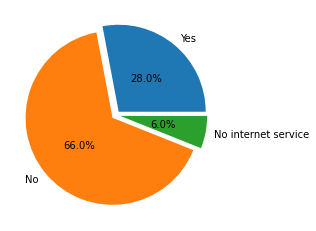

In [206]:
#plot of online backup choice of customers with Churn=Yes
plt.pie(x=[ob_y,ob_n, ob_ns], autopct="%.1f%%", explode=[0.05]*3, labels=['Yes','No', 'No internet service'], pctdistance=0.5)

In [207]:
#66% of churned customers did not have Online backup

([<matplotlib.patches.Wedge at 0x297aa318640>,
 [Text(0.46208434190294584, 1.0530802728036082, 'Yes'),
  Text(-1.098859688286591, -0.33912738824621075, 'No'),
  Text(0.7520820105277928, -0.869984281145627, 'No internet service')],
 [Text(0.22099685917097406, 0.50364708699303, '36.8%'),
  Text(-0.5255415900501088, -0.1621913595960138, '35.9%'),
  Text(0.3596913963393791, -0.41607943880877807, '27.3%')])

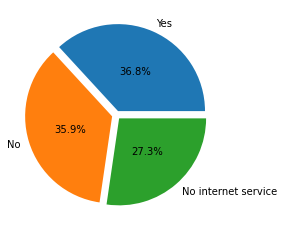

In [208]:
c_no = data[data.Churn == 'No']
ob_y = len(c_no[c_no.OnlineBackup == 'Yes'])
ob_n = len(c_no[c_no.OnlineBackup == 'No'])
ob_ns = len(c_no[c_no.OnlineBackup == 'No internet service'])
#plot of online backup choice of customers with Churn=No
plt.pie(x=[ob_y,ob_n, ob_ns], autopct="%.1f%%", explode=[0.05]*3, labels=['Yes','No', 'No internet service'], pctdistance=0.5)

In [209]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


([<matplotlib.patches.Wedge at 0x297aa364250>,
 [Text(0.5754031158661405, 0.9956963664950964, 'Yes'),
  Text(-1.1295570142395301, -0.21587253549786795, 'No'),
  Text(0.7520818476201657, -0.8699844219756112, 'No internet service')],
 [Text(0.2751927945446758, 0.4762026100628721, '33.3%'),
  Text(-0.5402229198536883, -0.10324338654245857, '39.4%'),
  Text(0.3596913184270358, -0.41607950616224876, '27.3%')])

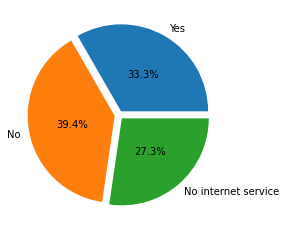

In [210]:
#plot of online security choice of customers with Churn=No
c_no = data[data.Churn == 'No']
os_y = len(c_no[c_no.OnlineSecurity == 'Yes'])
os_n = len(c_no[c_no.OnlineSecurity == 'No'])
os_ns = len(c_no[c_no.OnlineSecurity == 'No internet service'])
#plot of online security choice of customers with Churn=No
plt.pie(x=[os_y,os_n, os_ns], autopct="%.1f%%", explode=[0.05]*3, labels=['Yes','No', 'No internet service'], pctdistance=0.5)

([<matplotlib.patches.Wedge at 0x297aa3a6be0>,
 [Text(1.01149163744938, 0.5471605499028342, 'Yes'),
  Text(-1.096604816409715, -0.34634935632539426, 'No'),
  Text(1.1293176596285532, -0.21712121879514093, 'No internet service')],
 [Text(0.48375687008448615, 0.26168548038831196, '15.8%'),
  Text(-0.5244631730655159, -0.1656453443295364, '78.2%'),
  Text(0.540108445909308, -0.10384058290202393, '6.0%')])

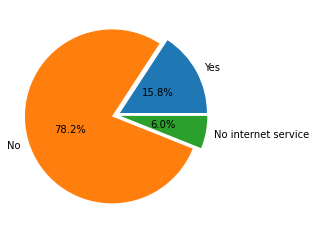

In [211]:
#plot of online security choice of customers with Churn=Yes
c_yes = data[data.Churn == 'Yes']
os_yy = len(c_yes[c_yes.OnlineSecurity == 'Yes'])
os_ny = len(c_yes[c_yes.OnlineSecurity == 'No'])
os_nsy = len(c_yes[c_yes.OnlineSecurity == 'No internet service'])
#plot of online security choice of customers with Churn=Yes
plt.pie(x=[os_yy,os_ny, os_nsy], autopct="%.1f%%", explode=[0.05]*3, labels=['Yes','No', 'No internet service'], pctdistance=0.5)

In [212]:
#78% of the churn customers has no online security

In [213]:
data[(data.StreamingMovies == "Yes") & (data.StreamingTV == 'No')]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
19,0,No,No,21,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.9,No
20,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
45,0,No,No,49,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.50,3906.7,No
54,1,Yes,Yes,60,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),74.85,4456.35,No
74,0,No,Yes,3,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.50,177.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,0,Yes,Yes,72,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Electronic check,74.35,5237.4,No
6996,0,Yes,Yes,41,Yes,No,DSL,No,Yes,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),66.50,2728.6,Yes
6998,0,No,No,13,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.50,1011.8,No
7004,0,No,No,38,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),95.10,3691.2,No


In [214]:
data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [215]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


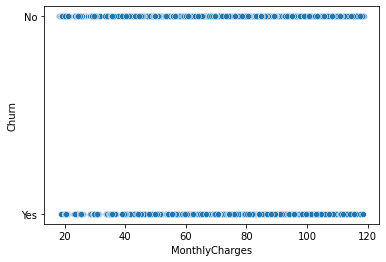

In [216]:
sns.scatterplot(data.MonthlyCharges, data.Churn)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


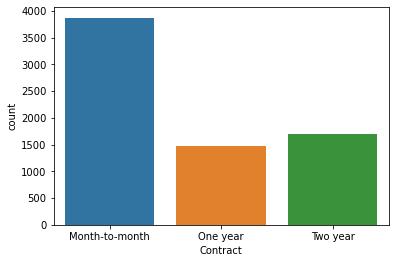

In [217]:
sns.countplot(data.Contract)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


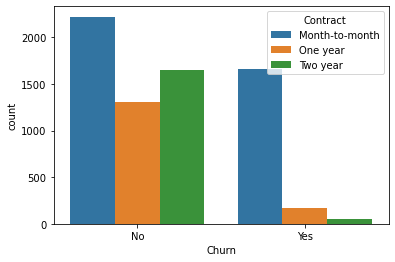

In [218]:
sns.countplot(data.Churn, hue=data.Contract)

In [219]:
# Chance of Churn is less in people who took long term contract

In [220]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


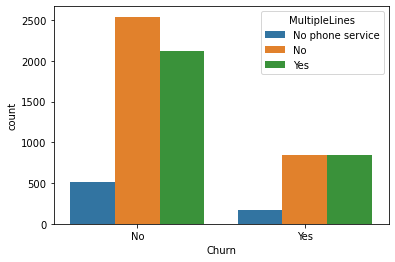

In [221]:
sns.countplot(data.Churn, hue=data.MultipleLines)

In [222]:
#No need to check skewness and outliers since all are categorical

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


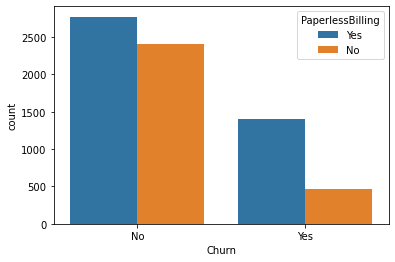

In [223]:
sns.countplot(data.Churn, hue=data.PaperlessBilling)

In [224]:
#totalcahrge column is object. we want to convert it to float
data.TotalCharges.replace(" ", np.nan, inplace=True)

In [225]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])

In [226]:
data.TotalCharges.fillna(data.TotalCharges.mean(),inplace=True)

In [227]:
data.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [228]:
data.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [229]:
#encoding
from sklearn.preprocessing import LabelEncoder
columns = ["Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",
           "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
          "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]
for i in columns:
    le = LabelEncoder()
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [230]:
data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [231]:
x = data.iloc[:,0:-1]

In [232]:
y = data.iloc[:,-1]

In [233]:
x.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000


In [235]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
columns = ["tenure", "MonthlyCharges", "TotalCharges"]
for i in columns:
    sc = MinMaxScaler()
    sc.fit(np.array(x[i]).reshape(-1,1))
    x[i] = sc.transform(np.array(x[i]).reshape(-1,1))

In [237]:
x.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,0.449599,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.462803,0.261309
std,0.368612,0.499748,0.458110,0.341104,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.299403,0.261366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.171642,0.044245
50%,0.000000,0.000000,0.000000,0.402778,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.518408,0.159445
75%,0.000000,1.000000,1.000000,0.763889,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.712438,0.434780
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000


In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [239]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_acc:
        max_acc = acc
        max_rs = i
print("Best random state=",max_rs)

Best random state= 35


In [240]:
#Best random state is 35 

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 35)

In [242]:
models = {"SVC":SVC(),"KNN":KNeighborsClassifier(), "RandomForest":RandomForestClassifier(),"LogisticRegression":LogisticRegression(), "naive":GaussianNB() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    sc = accuracy_score(y_test,pred)
    acc[i] = sc
    mod_list.append(mod)
print(acc)

{'SVC': 0.8116129032258065, 'KNN': 0.7651612903225806, 'RandomForest': 0.8135483870967742, 'LogisticRegression': 0.8270967741935484, 'naive': 0.7741935483870968}


In [243]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [244]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVC()': 0.7935557318593759, 'KNeighborsClassifier()': 0.7570629563518309, 'RandomForestClassifier()': 0.7890098760536511, 'LogisticRegression()': 0.8030675360519532, 'GaussianNB()': 0.7520941876052524}


In [245]:
#Best algorithm here is KNN(difference = 0.81)

In [246]:
#Hyper parameter tuning

In [247]:
from sklearn.model_selection import GridSearchCV

In [252]:
parameters = {'metric': ['euclidean', 'manhattan'],
 'n_neighbors': np.arange(1, 16)}

In [253]:
GCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)

In [254]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])})

In [255]:
GCV.best_params_

{'metric': 'manhattan', 'n_neighbors': 12}

In [256]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [257]:
accuracy_score(y_test, GCV_predict)

0.7890322580645162

In [258]:
import joblib

In [259]:
joblib.dump(GCV.best_estimator_, "Churn.obj")

['Churn.obj']